# CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS♦

In [2]:
df = pd.read_csv('../../02_Datos/03_Trabajo/trabajo.csv', index_col= 0).reset_index()
df.head()

,index,mpg,cilindros,desplazamiento,caballos,peso,aceleracion,any_modelo,origen,nombre_auto
0,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
2,5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
3,6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
4,7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii


In [3]:
df.drop(columns= 'index', inplace= True)

## VISIÓN GENERAL

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             279 non-null    float64
 1   cilindros       279 non-null    int64  
 2   desplazamiento  279 non-null    float64
 3   caballos        279 non-null    object 
 4   peso            279 non-null    float64
 5   aceleracion     279 non-null    float64
 6   any_modelo      279 non-null    int64  
 7   origen          279 non-null    int64  
 8   nombre_auto     279 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 19.7+ KB


Se tendría que revisar la columna **caballos** porque tiene que ser una variable numérica y es un object.

## TIPOS DE DATOS

### Identificación

In [5]:
df.dtypes

mpg               float64
cilindros           int64
desplazamiento    float64
caballos           object
peso              float64
aceleracion       float64
any_modelo          int64
origen              int64
nombre_auto        object
dtype: object

Al cambiar el tipo de variable a float da el siguiente error:

**ValueError**: could not convert string to float: '?': Error while type casting for column 'caballos'

Replazaremos el '?' por un **-999** para despúes aplicar la media o moda según determinemos.

### Corrección

In [6]:
df['caballos'] = df.caballos.replace({'?':np.nan})

In [7]:
df = df.astype({'caballos':'float64',
                'cilindros':'object',
                'any_modelo':'object',
                'origen':'object'})
df.dtypes

mpg               float64
cilindros          object
desplazamiento    float64
caballos          float64
peso              float64
aceleracion       float64
any_modelo         object
origen             object
nombre_auto        object
dtype: object

## VALORES ÚNICOS

### Identificación

In [8]:
df.nunique().sort_values()

origen              3
cilindros           5
any_modelo         13
desplazamiento     69
caballos           81
aceleracion        85
mpg               108
nombre_auto       225
peso              249
dtype: int64

No identificamos constantes entre las variables.

## DUPLICADOS

### Identificación

In [9]:
df.duplicated().sum()

0

No hay valores duplicados

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [10]:
cat = df.select_dtypes(exclude= 'number').copy()

### Numéricas

In [11]:
num = df.select_dtypes(include= 'number').copy()

## GESTIÓN DE CATEGÓRICAS

Estadísticos y gráficos de las variables categóricas

In [12]:
def estadisticos_cont(df_cat):
    #Calculamos describe
    estadisticos = df_cat.describe().T
    return(estadisticos)

estadisticos_cont(cat)

,count,unique,top,freq
cilindros,279,5,4,146
any_modelo,279,13,73,25
origen,279,3,1,177
nombre_auto,279,225,toyota corolla,5


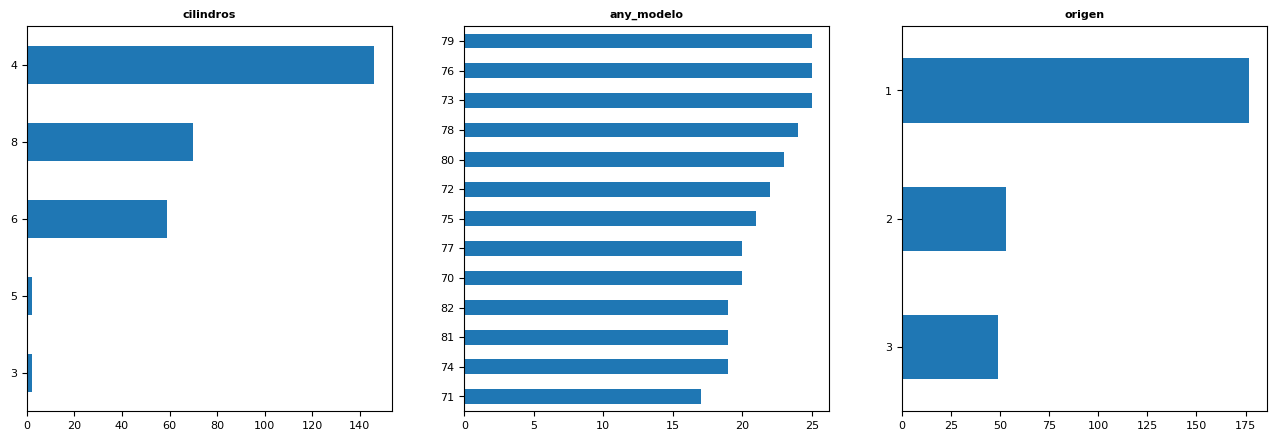

In [13]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts(ascending = True).plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 8, fontweight = "bold")
        ax[cada].tick_params(labelsize = 8)
                
graficos_eda_categoricos(cat[['cilindros','any_modelo','origen']])

<Axes: >

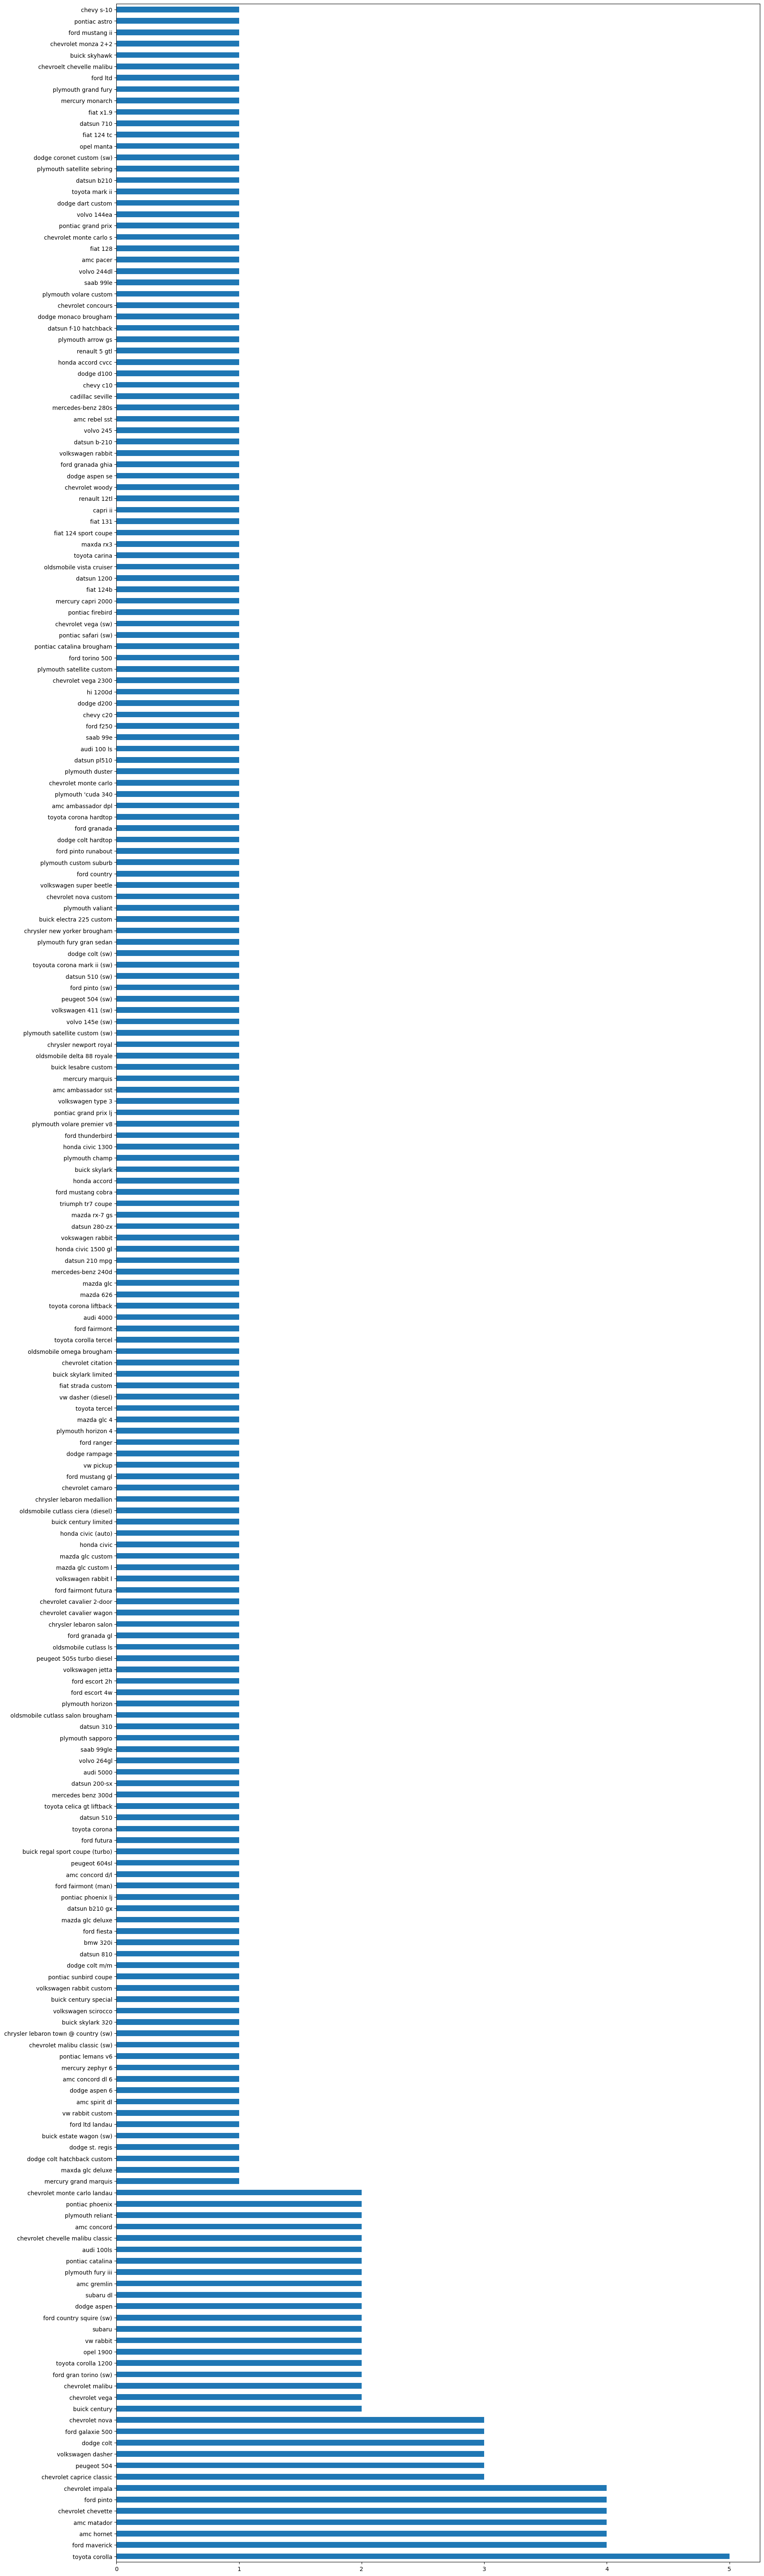

In [14]:
plt.figure(figsize=(20,80))
df.nombre_auto.value_counts().plot.barh()

### Correcciones

Arreglamos los nombres con abreviados.

In [15]:
cat[(cat.nombre_auto.str.contains('vw')) | (cat.nombre_auto.str.contains('volkswagen')) ]

,cilindros,any_modelo,origen,nombre_auto
39,4,72,2,volkswagen type 3
53,4,72,2,volkswagen 411 (sw)
69,4,73,2,volkswagen super beetle
96,4,74,2,volkswagen dasher
117,4,75,2,volkswagen dasher
135,4,76,2,vw rabbit
138,4,76,2,volkswagen rabbit
161,4,77,2,volkswagen rabbit custom
166,4,77,2,volkswagen dasher
192,4,78,2,volkswagen scirocco


In [16]:
cat.nombre_auto = cat.nombre_auto.replace( {'vw rabbit':'volkswagen rabbit',
                        'vw dasher (diesel)':'volkswagen dasher Diesel',
                        'vw pickup':'volkswagen pickup'}
                      )

cat[(cat.nombre_auto.str.contains('vw')) | (cat.nombre_auto.str.contains('volkswagen')) ]

,cilindros,any_modelo,origen,nombre_auto
39,4,72,2,volkswagen type 3
53,4,72,2,volkswagen 411 (sw)
69,4,73,2,volkswagen super beetle
96,4,74,2,volkswagen dasher
117,4,75,2,volkswagen dasher
135,4,76,2,volkswagen rabbit
138,4,76,2,volkswagen rabbit
161,4,77,2,volkswagen rabbit custom
166,4,77,2,volkswagen dasher
192,4,78,2,volkswagen scirocco


In [17]:
df[(df.nombre_auto.str.contains('chevy')) | (df.nombre_auto.str.contains('chevrolet'))]

,mpg,cilindros,desplazamiento,caballos,peso,aceleracion,any_modelo,origen,nombre_auto
3,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
8,15.0,8,400.0,150.0,3761.0,9.5,70,1,chevrolet monte carlo
17,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20
20,28.0,4,140.0,90.0,2264.0,15.5,71,1,chevrolet vega 2300
25,14.0,8,350.0,165.0,4209.0,12.0,71,1,chevrolet impala
30,22.0,4,140.0,72.0,2408.0,19.0,71,1,chevrolet vega (sw)
40,20.0,4,140.0,90.0,2408.0,19.5,72,1,chevrolet vega
42,13.0,8,350.0,165.0,4274.0,12.0,72,1,chevrolet impala
60,13.0,8,350.0,145.0,3988.0,13.0,73,1,chevrolet malibu
61,13.0,8,400.0,150.0,4464.0,12.0,73,1,chevrolet caprice classic


In [18]:
cat.nombre_auto = cat.nombre_auto.replace( {'chevy s-10':'chevrolet s-10',
                        'chevy c10':'chevrolet c10',
                        'chevy c20':'chevrolet c20'}
                      )

cat[(cat.nombre_auto.str.contains('chevy'))]

,cilindros,any_modelo,origen,nombre_auto


### Creación de variables de comentarios

### Creación de variables

In [19]:
#cargamos lista de palabras stpo_words

stop = pd.read_csv('../../01_Documentos/Stop_Words.txt',names = ['termino'])

def quitar_tildes(palabra):
    #Definimos la versión con tildes y símbolos y la sin
    con = 'áéíóúüñÁÉÍÓÚÜÑ'
    sin = 'aeiouunAEIOUUN'
    #Creamos un traductor
    traductor = str.maketrans(con,sin)
    #Aplicamos el traductor y devolvemos la palabra limpia
    return(palabra.translate(traductor))

stop['limpias'] = stop.termino.transform(quitar_tildes)
### Creación de variables de comentarios
#
from sklearn.feature_extraction.text import CountVectorizer

#Instanciamos
cv = CountVectorizer(strip_accents = 'unicode',
                     stop_words = stop.limpias.to_list(),
                     max_df = 0.8,
                     min_df = 3)

#Entrenamos
cv_fit = cv.fit(cat.nombre_auto)

#Aplicamos
caracteristicas = cv.transform(cat.nombre_auto)
nombre_variabes = cv.get_feature_names_out()
columnas = pd.DataFrame.sparse.from_spmatrix(caracteristicas,columns= nombre_variabes)



In [24]:
import joblib

# Guardamos CountVectorizer y lista de stop_words
joblib.dump(cv, '../../09_Otros/count_vectorizer_model.pkl')
joblib.dump(stop.limpias.to_list(), '../../09_Otros/stop_words_list.pkl')

['../../09_Otros/stop_words_list.pkl']

#### GUARDAMOS COUNTVECTORIZER

In [ ]:
df_tablon.to_pickle('../../02_Datos/03_Trabajo/tablon_analitico.pickle')

### ACTUALIZAMOS DATASET CAT CON LAS NUEVAS VARIABLES

In [20]:
cat_nom_auto = pd.DataFrame(columnas,  columns= nombre_variabes)
cat.drop(columns='nombre_auto',inplace= True)

### UNIFICAR COLUMNAS CATEGÓRICAS

In [21]:
cat = pd.concat([cat_nom_auto, cat],axis=1)

### NULOS

In [22]:
cat.isna().sum().sort_values(ascending=False)

1200          0
matador       0
oldsmobile    0
nova          0
mustang       0
             ..
custom        0
coupe         0
country       0
corona        0
origen        0
Length: 76, dtype: int64

## GESTIÓN DE NUMÉRICAS

Estadísticos y gráficos variables numéricas

In [23]:
def estadisticos_cont(df_cont):
    #Calculamos describe
    estadisticos = df_cont.describe().T
    #Añadimos la mediana
    estadisticos['median'] = df_cont.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
mpg,279.0,23.360215,23.0,7.733899,9.0,17.0,23.0,28.9,46.6
desplazamiento,279.0,194.008961,146.0,105.324972,70.0,99.5,146.0,261.0,455.0
caballos,276.0,105.000000,90.5,39.287657,46.0,76.0,90.5,126.0,230.0
peso,279.0,2989.050179,2807.0,858.004443,1613.0,2235.5,2807.0,3616.5,5140.0
aceleracion,279.0,15.606093,15.5,2.825093,8.0,14.0,15.5,17.0,24.8


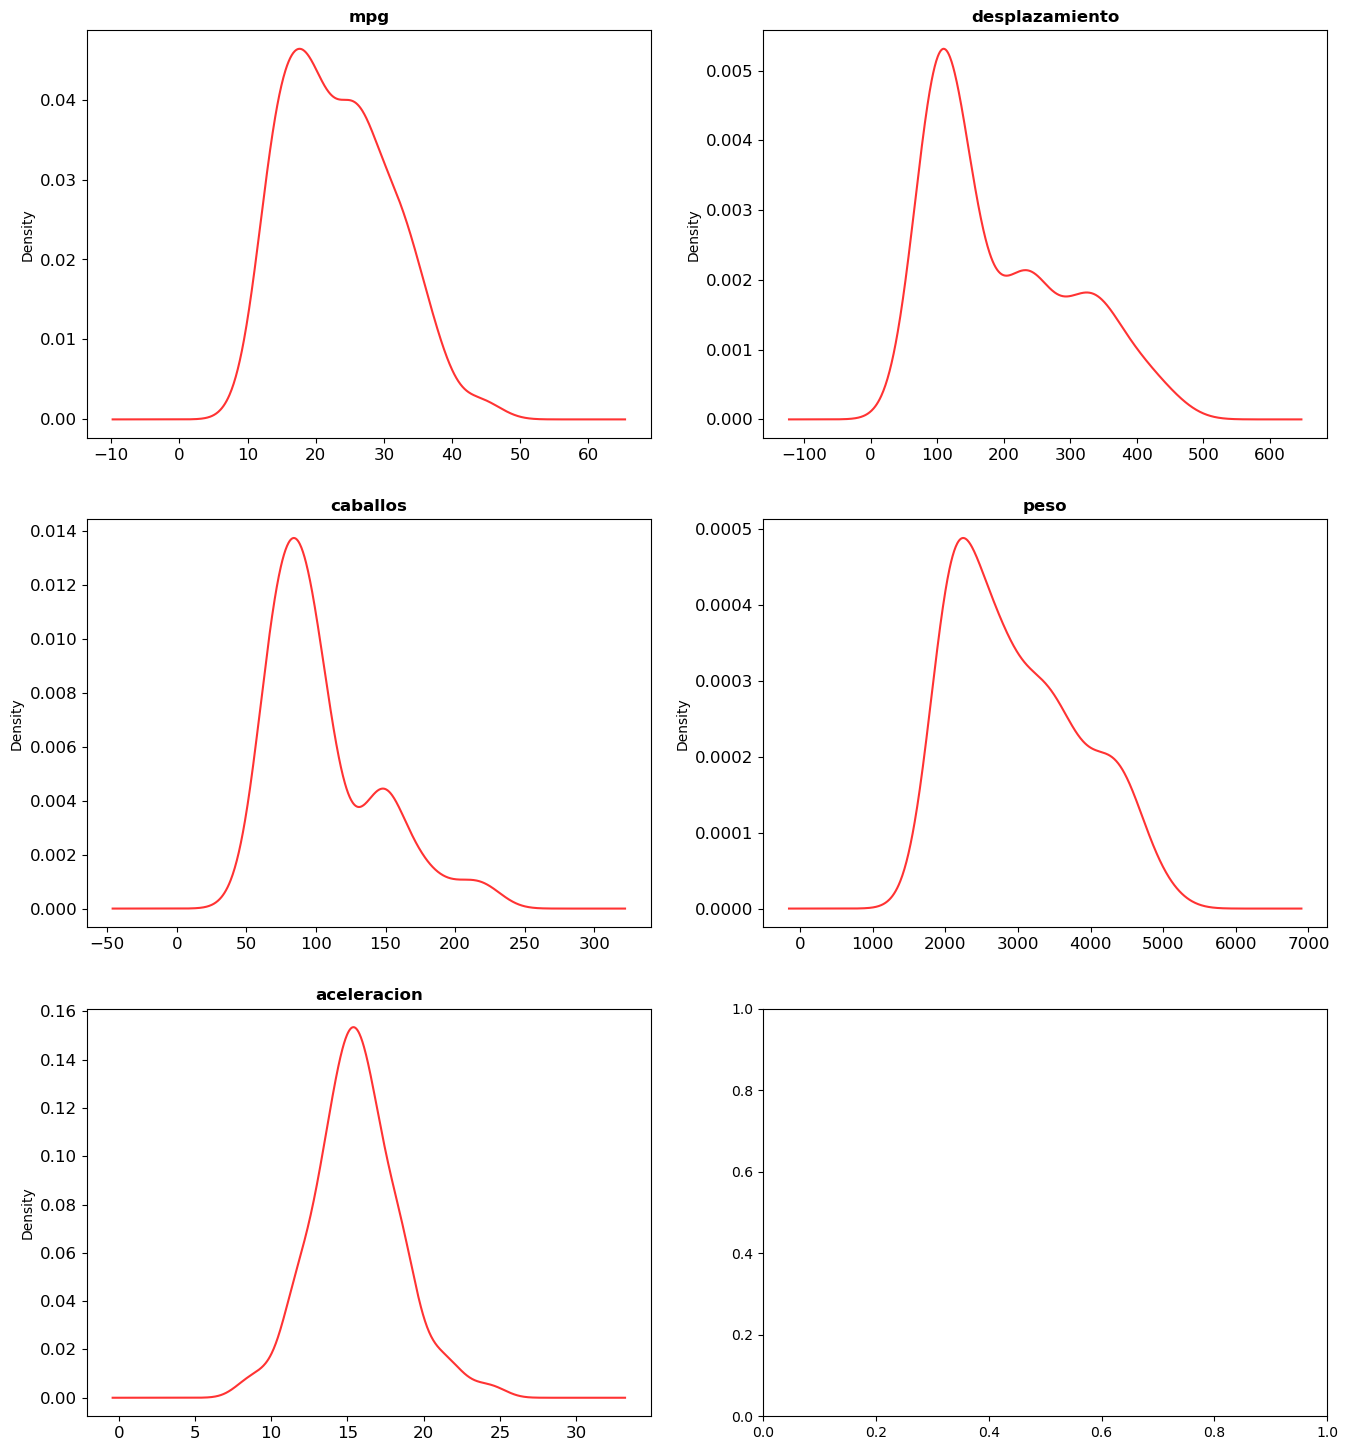

In [24]:
def graficos_eda_continuas(df_cont):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(df_cont.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cont):
        df_cont[variable].plot.density(ax = ax[cada], color = 'r', alpha= 0.8)
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
    
graficos_eda_continuas(num)

<Figure size 1600x1000 with 0 Axes>

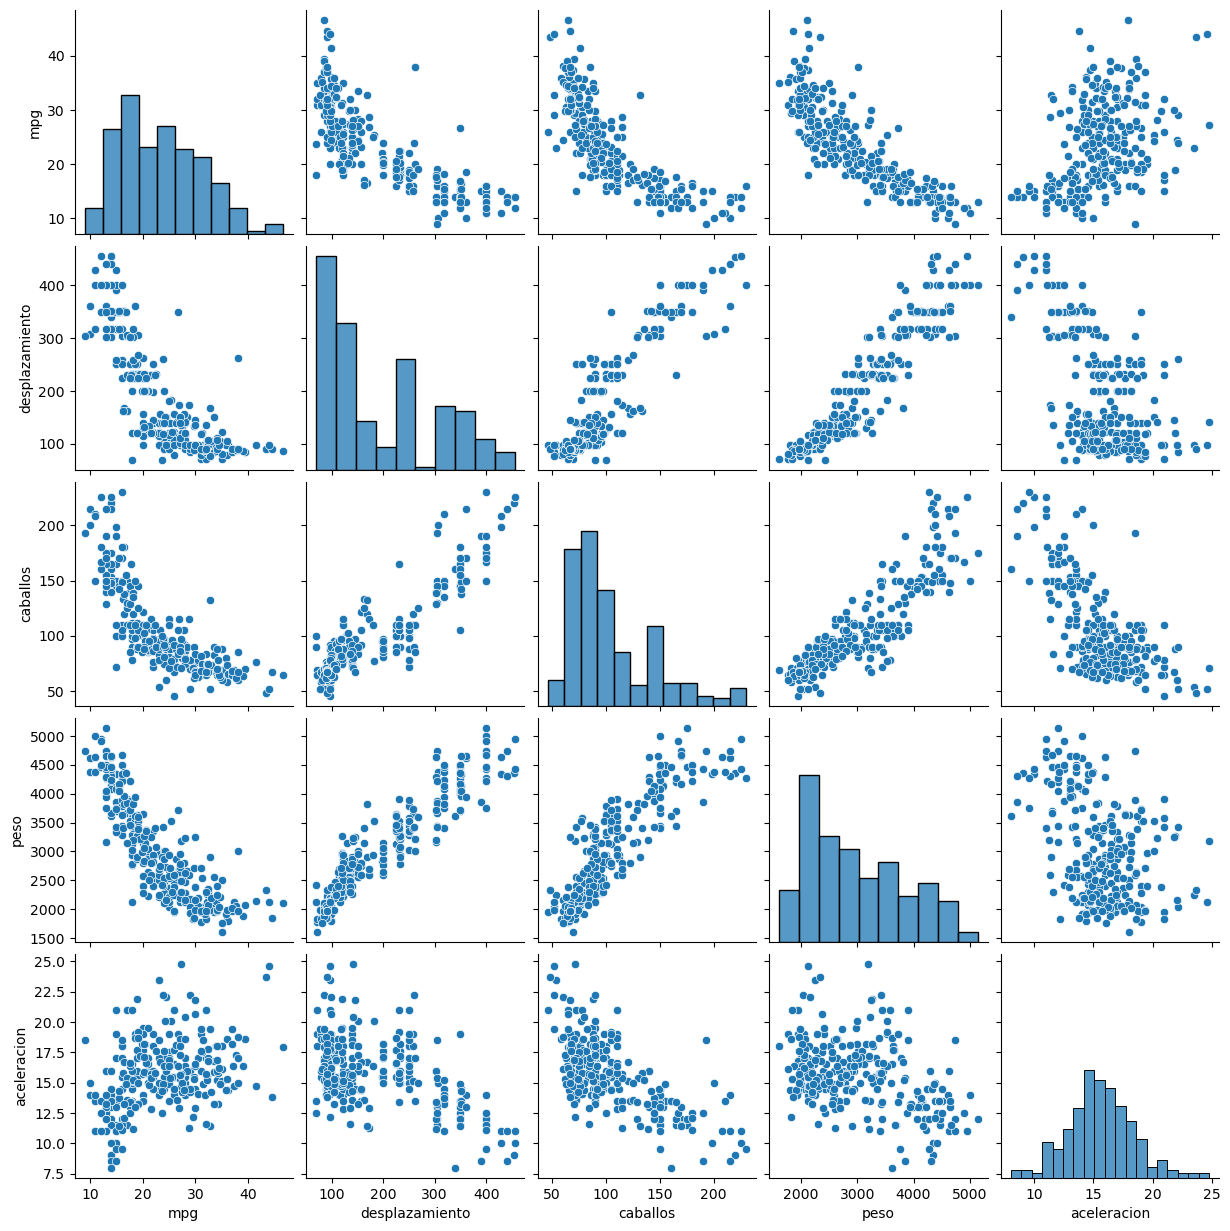

In [25]:
plt.figure(figsize=(16,10))
sns.pairplot(num);

Los atípicos se imputaran según: 

**caballos** --> -999 --> Mediana


### NULOS

In [26]:
num.isna().sum()

mpg               0
desplazamiento    0
caballos          3
peso              0
aceleracion       0
dtype: int64

#### Imputar por mediana

In [27]:
#variables a imputar
var_imputar_mediana = ['caballos']

#función para imputar por la mediana
num['caballos'] = num.caballos.fillna(int(num.caballos.median()))


### Revisar estado nulos tras imputación a la mediana

In [28]:
num.isna().sum()

mpg               0
desplazamiento    0
caballos          0
peso              0
aceleracion       0
dtype: int64

### ATÍPICOS

Por desviación típica

Identificación

In [29]:
num_desv_tip = 4

In [30]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

In [31]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

In [32]:
for variable in num.columns:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


mpg:

Series([], Name: mpg, dtype: int64)

desplazamiento:

Series([], Name: desplazamiento, dtype: int64)

caballos:

Series([], Name: caballos, dtype: int64)

peso:

Series([], Name: peso, dtype: int64)

aceleracion:

Series([], Name: aceleracion, dtype: int64)


No se aprecia atípicos en las variables numéricas

## VERIFICAR TAMAÑO DE LOS DATASETS

In [33]:
print('Categóricas:', cat.shape[0], 'registros')
print('Numéricas:', num.shape[0], 'registros')

Categóricas: 279 registros
Numéricas: 279 registros


## GUARDAR DATASETS TRAS LA CALIDAD DE DATOS

In [34]:
df_tablon = pd.concat([num,cat],axis=1)

In [35]:
df_tablon.to_pickle('../../02_Datos/03_Trabajo/tablon_analitico.pickle')